In [1]:
#import the libraries

import numpy as np
import pandas as pd
import sklearn  #..we do the data preprocessing

In [2]:
# import the dataset

data = pd.read_csv('C:\\Users\\MUJTABA\\Documents\\_MY_PRECIOUS\\TU\\Studies\\2nd year\\3rd sem\\AI\\project\\zomato_indore.csv')

In [3]:
data.head()  #check the first 5 rows of the dataset.

,Unnamed: 0,name,locality,latitude,longitude,cuisines,average_cost_for_two,aggregate_rating,votes,rating_text
0,0,Namo Sandwich,Sudama Nagar,22.696331,75.834857,Fast Food,500,4.3,860,Very Good
1,1,Bake N Shake,"BCM Heights, Vijay Nagar",22.755705,75.895287,"Cafe, Fast Food, Bakery",500,4.2,683,Very Good
2,2,Shree Gurukripa,Sarwate Bus Stand,22.714090,75.868851,North Indian,350,4.3,2030,Very Good
3,3,Nafees Restaurant,Old Palasia,22.725712,75.887757,"North Indian, Mughlai",800,4.3,2987,Very Good
4,4,Hotel Guru Kripa,Sarwate Bus Stand,22.714086,75.868846,North Indian,350,4.3,3441,Very Good


In [4]:
type(data) #check the datatype of dataset

pandas.core.frame.DataFrame

In [5]:
data.shape # show rows and columns of dataset.

(2851, 10)

In [6]:
data.describe()

,Unnamed: 0,latitude,longitude,average_cost_for_two,aggregate_rating,votes
count,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000
mean,1491.662224,22.725029,75.878998,655.866363,3.887759,512.119256
std,862.490509,0.029429,0.029798,478.290545,0.518230,547.966306
min,0.000000,22.598015,75.000000,50.000000,2.100000,4.000000
25%,731.500000,22.713932,75.868587,300.000000,3.600000,99.500000
50%,1531.000000,22.725682,75.885655,500.000000,4.000000,412.000000
75%,2243.500000,22.750034,75.894870,800.000000,4.300000,692.000000
max,2957.000000,22.801616,75.938489,2600.000000,4.900000,3441.000000


In [7]:
data.columns

Index(['Unnamed: 0', 'name', 'locality', 'latitude', 'longitude', 'cuisines',
       'average_cost_for_two', 'aggregate_rating', 'votes', 'rating_text'],
      dtype='object')

In [8]:
data_new = data[['locality','latitude','longitude','cuisines','average_cost_for_two','aggregate_rating','votes']]

In [9]:
data_new.head()

,locality,latitude,longitude,cuisines,average_cost_for_two,aggregate_rating,votes
0,Sudama Nagar,22.696331,75.834857,Fast Food,500,4.3,860
1,"BCM Heights, Vijay Nagar",22.755705,75.895287,"Cafe, Fast Food, Bakery",500,4.2,683
2,Sarwate Bus Stand,22.714090,75.868851,North Indian,350,4.3,2030
3,Old Palasia,22.725712,75.887757,"North Indian, Mughlai",800,4.3,2987
4,Sarwate Bus Stand,22.714086,75.868846,North Indian,350,4.3,3441


In [10]:
#since our dependent column is in penultimate(2nd-last) position, we have to move it to one of the extreme position

temp = data_new.pop('aggregate_rating')
data_new.insert(len(data_new.columns),'rating_new', temp)

In [11]:
data_new.head()

,locality,latitude,longitude,cuisines,average_cost_for_two,votes,rating_new
0,Sudama Nagar,22.696331,75.834857,Fast Food,500,860,4.3
1,"BCM Heights, Vijay Nagar",22.755705,75.895287,"Cafe, Fast Food, Bakery",500,683,4.2
2,Sarwate Bus Stand,22.714090,75.868851,North Indian,350,2030,4.3
3,Old Palasia,22.725712,75.887757,"North Indian, Mughlai",800,2987,4.3
4,Sarwate Bus Stand,22.714086,75.868846,North Indian,350,3441,4.3


In [12]:
data_new.shape

(2851, 7)

In [13]:
# Extraction of dependent and independent columns
# iloc is used to extract independent and dependent columns 
# x - independent columns
# y - dependent column

#In x we will consider only locality,latitude,longitude,cuisines,average_cost_for_two,votes

x = data_new.iloc[ : ,0:6].values
print(x)

[['Sudama Nagar' 22.69633146 75.83485689 'Fast Food' 500 860]
 ['BCM Heights, Vijay Nagar' 22.75570457 75.89528706
  'Cafe, Fast Food, Bakery' 500 683]
 ['Sarwate Bus Stand' 22.71408953 75.86885054 'North Indian' 350 2030]
 ...
 ['Radisson Blu Hotel, Vijay Nagar' 22.75003008 75.90347148
  'Asian, Chinese, Momos' 1850 248]
 ['Radisson Blu Hotel, Vijay Nagar' 22.75003534 75.90347953
  'North Indian, Kashmiri' 1850 200]
 ['Indore Marriott Hotel, Vijay Nagar' 22.7528774 75.88345349 'Bakery'
  1500 197]]


In [14]:
y = data_new.iloc[ : ,6:7].values # dependent variable
print(y)

[[4.3]
 [4.2]
 [4.3]
 ...
 [4.6]
 [4.3]
 [4.4]]


In [15]:
# to change x into dataframe, we use above command. In this way we can use head() or .null() on x as well.
# If x is changed into dataframe, then we need to add iloc while using fit_transform method

x = data_new.iloc[ : , 0:6]  
x.head()

,locality,latitude,longitude,cuisines,average_cost_for_two,votes
0,Sudama Nagar,22.696331,75.834857,Fast Food,500,860
1,"BCM Heights, Vijay Nagar",22.755705,75.895287,"Cafe, Fast Food, Bakery",500,683
2,Sarwate Bus Stand,22.714090,75.868851,North Indian,350,2030
3,Old Palasia,22.725712,75.887757,"North Indian, Mughlai",800,2987
4,Sarwate Bus Stand,22.714086,75.868846,North Indian,350,3441


In [16]:
y = data_new.iloc[ : , 6:7]  
y.head()

,rating_new
0,4.3
1,4.2
2,4.3
3,4.3
4,4.3


In [17]:
# Handling missing values

x.isnull().sum()

locality                0
latitude                0
longitude               0
cuisines                0
average_cost_for_two    0
votes                   0
dtype: int64

In [18]:
y.isnull().sum()

rating_new    0
dtype: int64

In [19]:
# Checking data types

x.dtypes

locality                 object
latitude                float64
longitude               float64
cuisines                 object
average_cost_for_two      int64
votes                     int64
dtype: object

In [20]:
y.dtypes

rating_new    float64
dtype: object

In [21]:
# using dictionary to convert datatypes of specific columns

convert_dict = {'locality':str,'latitude':float,'longitude':float,'cuisines':str,'average_cost_for_two':int,'votes':int}
x = x.astype(convert_dict)
print(x.dtypes)   

y = y.astype(float)
print(y.dtypes)

locality                 object
latitude                float64
longitude               float64
cuisines                 object
average_cost_for_two      int32
votes                     int32
dtype: object
rating_new    float64
dtype: object


In [22]:
#Checking unique values for Label Encoding

#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

for i in x:
    unique_vals = np.unique(x[i])
    no_values = len(unique_vals)
    if no_values < 10:
        print("The no. of values for",i,":",no_values,"given as",unique_vals)
    else:
        print("The no. of values for",i,":",no_values)
print("------")
print("The no. of values for rating_new column in dependent variable is", y.rating_new.unique())

The no. of values for locality : 69
The no. of values for latitude : 896
The no. of values for longitude : 896
The no. of values for cuisines : 282
The no. of values for average_cost_for_two : 34
The no. of values for votes : 400
------
The no. of values for rating_new column in dependent variable is [4.3 4.2 4.1 4.6 3.9 4.7 4.  4.8 4.9 3.8 4.4 4.5 3.7 3.6 3.3 3.5 3.4 3.2
 3.1 3.  2.5 2.9 2.8 2.7 2.1 2.2 2.3 2.4 2.6]


In [23]:
x.head()

,locality,latitude,longitude,cuisines,average_cost_for_two,votes
0,Sudama Nagar,22.696331,75.834857,Fast Food,500,860
1,"BCM Heights, Vijay Nagar",22.755705,75.895287,"Cafe, Fast Food, Bakery",500,683
2,Sarwate Bus Stand,22.714090,75.868851,North Indian,350,2030
3,Old Palasia,22.725712,75.887757,"North Indian, Mughlai",800,2987
4,Sarwate Bus Stand,22.714086,75.868846,North Indian,350,3441


In [24]:
# There are many unique values and we have to turn it into numeric form for feature scalling. 
# Since OHE will return many columns which is not suitable, therefore we use label encoding.

# Handling categorical data using Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

x.iloc[ : ,0] = le.fit_transform(x.iloc[ : ,0])
x.iloc[ : ,1] = le.fit_transform(x.iloc[ : ,1])
x.iloc[ : ,2] = le.fit_transform(x.iloc[ : ,2])
x.iloc[ : ,3] = le.fit_transform(x.iloc[ : ,3])
x.iloc[ : ,4] = le.fit_transform(x.iloc[ : ,4])
x.iloc[ : ,5] = le.fit_transform(x.iloc[ : ,5])

x.head()

,locality,latitude,longitude,cuisines,average_cost_for_two,votes
0,62,146,93,97,9,367
1,4,815,692,42,9,343
2,59,276,277,175,6,394
3,45,518,536,233,15,398
4,59,275,276,175,6,399


In [25]:
# Handling categorical data using Label Encoding
y.iloc[ : ,0] = le.fit_transform(x.iloc[ : ,0])

y.head()

,rating_new
0,62
1,4
2,59
3,45
4,59


In [26]:
#Splitting the dataset into training dataset and testing dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=100) 

#The order of the above variables on L.H.S should be exact.
#random_state is optional part.
#If random state is taken, it signifies that sequence of data is changed and any row can be taken as testing dataset's part.
#It can be any number and particular sequence is attached to particular number.

In [27]:
len(x_train)

2280

In [28]:
len(x_test)

571

In [29]:
len(y_train)

2280

In [30]:
len(y_test)

571

In [31]:
#Feature Scaling using Sandardization

from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.transform(x_test)

In [32]:
print(x_train)

[[ 0.51897492 -1.79258562 -1.85197701  0.34253689 -1.2294392  -1.71392716]
 [-0.28166904  0.76633818  0.7979089   1.5734123   0.56965129  1.01051027]
 [-0.54855037  0.93745163  1.38496055 -0.73606528  2.50713336  1.10082311]
 ...
 [ 0.38553426 -1.68758418 -1.68483036 -1.05330121 -0.12230659  0.55141998]
 [-1.88295698  0.92189586  1.41757453  0.49481013  1.1232176   1.0782449 ]
 [ 1.09721779  1.58690494  1.48280249  0.81204607  1.26160917  0.43100286]]


In [33]:
print(x_test)

[[ 0.29657382 -0.55979102 -0.64525973 -0.62186034 -1.2294392   0.77720209]
 [-1.08231301  0.4707786  -0.59226202  0.49481013 -0.95265605  1.19866203]
 [-1.66055587 -1.52035968 -0.98770653  0.86280381 -0.6758729   0.53636784]
 ...
 [ 0.11865294  0.05077287  0.69599021  1.3703813   0.29286814  0.37832037]
 [ 0.38553426 -1.71480678 -1.56660468 -1.63701532 -0.26069817  0.46110714]
 [-1.34919433 -1.69536207  1.7151771   1.06583481  1.26160917 -1.5031972 ]]


## Model Building-Bagging vs Boosting using base estimator as Decision Tree with entropy

In [34]:
# to create the DT model - base estimator (entropy)
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='entropy') 

# train the classifier on training data
DTC.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [35]:
y_pred = DTC.predict(x_test)
y_pred

array([49, 18,  5, 22, 60,  4, 51, 51,  4, 45, 36, 67, 67, 49, 50, 46, 58,
        3, 56,  5, 67,  7, 33,  7, 44, 44, 67,  7, 56, 36, 30,  4,  5,  0,
       67,  7, 56, 51, 36, 67, 62, 51,  0, 30, 28, 58,  3, 44, 36, 62, 25,
       39, 16, 56, 60, 18,  7, 67, 60, 45, 18, 67,  5,  8, 39, 59, 26, 59,
       44, 45, 36, 67, 56, 45, 45, 35, 66, 35,  3, 39, 36, 68, 45, 59, 67,
       32, 45, 45, 22, 53,  6, 36, 60, 26, 18, 60,  3, 67, 32, 38, 67, 67,
       16,  3,  9,  5, 59, 67, 16,  4, 60, 36, 44, 38,  4, 31, 45,  1, 68,
       66, 31, 35, 45, 51, 61, 54, 60, 54, 50, 68,  5,  7, 22, 67, 30, 67,
       61, 16,  5, 18, 45,  0, 51, 44, 54, 45, 62, 51, 59,  3, 67, 18, 25,
       68, 57, 56,  4, 34, 44, 68, 58,  5, 16, 45, 35, 44, 67,  5, 67, 49,
       45, 59, 18, 67,  5,  1, 67,  6, 45,  0, 56, 67, 67, 49, 43, 67, 67,
       22,  1, 45,  5, 60, 49, 18,  3, 64,  5, 62, 39, 67, 49,  8, 45, 51,
       67, 62, 67, 45, 30, 67, 68,  0,  0, 67, 60, 59, 59, 18, 45, 58, 44,
       67,  0, 29, 67, 67

--------

In [36]:
# to create boosting model

from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(base_estimator = DTC, n_estimators = 400, learning_rate = 1)

boostmodel = AdaBoost.fit(x_train, y_train)

C:\Users\MUJTABA\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [37]:
y_boostpred = boostmodel.predict(x_test)
y_boostpred

array([49, 18,  5, 22, 60,  4, 51, 51,  4, 45, 36, 67, 67, 49, 50, 46, 58,
        3, 56,  5, 67,  7, 33,  7, 44, 44, 67,  7, 56, 36, 30,  4,  5,  0,
       67,  7, 56, 51, 36, 67, 62, 51,  0, 30, 28, 58,  3, 44, 36, 62, 25,
       39, 16, 56, 60, 18,  7, 67, 60, 45, 18, 67,  5,  8, 39, 59, 26, 59,
       44, 45, 36, 67, 56, 45, 45, 35, 66, 35,  3, 39, 36, 68, 45, 59, 67,
       32, 45, 45, 22, 53,  6, 36, 60, 26, 18, 60,  3, 67, 32, 38, 67, 67,
       16,  3,  9,  5, 59, 67, 16,  4, 60, 36, 44, 38,  4, 31, 45,  1, 68,
       66, 31, 35, 45, 51, 61, 54, 60, 54, 50, 68,  5,  7, 22, 67, 30, 67,
       61, 16,  5, 18, 45,  0, 51, 44, 54, 45, 62, 51, 59,  3, 67, 18, 25,
       68, 57, 56,  4, 34, 44, 68, 58,  5, 16, 45, 35, 44, 67,  5, 67, 49,
       45, 59, 18, 67,  5,  1, 67,  6, 45,  0, 56, 67, 67, 49, 43, 67, 67,
       22,  1, 45,  5, 60, 49, 18,  3, 64,  5, 62, 39, 67, 49,  8, 45, 51,
       67, 62, 67, 45, 30, 67, 68,  0,  0, 67, 60, 59, 59, 18, 45, 58, 44,
       67,  0, 29, 67, 67

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_boostpred, y_test)*100

99.64973730297724

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_boostpred,y_test)
cm

array([[ 10,   0,   0, ...,   0,   0,   0],
       [  0,  14,   0, ...,   0,   0,   0],
       [  0,   0,   2, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   7,   0,   0],
       [  0,   0,   0, ...,   0, 106,   0],
       [  0,   0,   0, ...,   0,   0,  13]], dtype=int64)

<AxesSubplot:>

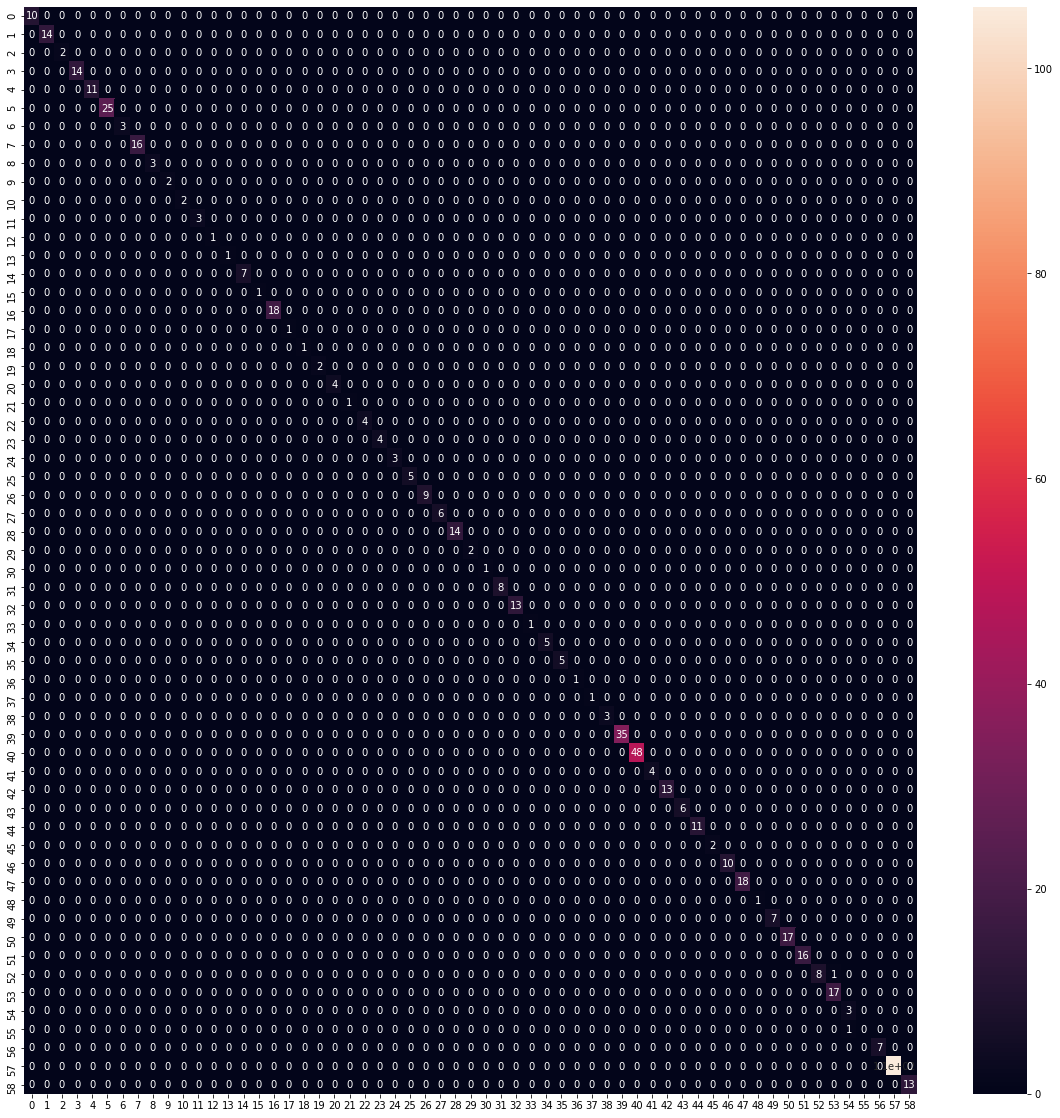

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
import seaborn as sns
sns.heatmap(cm, annot = True)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_boostpred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         7
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00        18
          19       1.00    

C:\Users\MUJTABA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-------

In [43]:
# to create bagging model

from sklearn.ensemble import BaggingClassifier
Bag = BaggingClassifier(base_estimator = DTC, n_estimators = 400, max_samples = 0.8, oob_score = True, random_state = 0)

Bag.fit(x_train, y_train)

C:\Users\MUJTABA\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),
                  max_samples=0.8, n_estimators=400, oob_score=True,
                  random_state=0)

In [44]:
y_bagpred = Bag.predict(x_test)
y_bagpred

array([49, 18,  5, 22, 60,  4, 51, 51,  4, 45, 36, 67, 67, 49, 50, 46, 58,
        3, 56,  5, 67,  7, 33,  7, 44, 44, 67,  7, 56, 36, 30,  4,  5,  0,
       67,  7, 56, 51, 36, 67, 62, 51,  0, 30, 28, 58,  3, 44, 36, 62, 25,
       39, 16, 56, 60, 18,  7, 67, 60, 45, 18, 67,  5,  8, 39, 59, 26, 59,
       44, 45, 36, 67, 56, 45, 45, 35, 66, 35,  3, 39, 36, 68, 45, 59, 67,
       32, 45, 45, 22, 53,  6, 36, 60, 26, 18, 60,  3, 67, 32, 38, 67, 67,
       16,  3,  9,  5, 59, 67, 16,  4, 60, 36, 44, 38,  4, 31, 45,  1, 68,
       66, 31, 35, 45, 51, 61, 54, 60, 54, 50, 68,  5,  7, 22, 67, 30, 67,
       61, 16,  5, 18, 45,  0, 51, 44, 54, 45, 62, 51, 59,  3, 67, 18, 25,
       68, 57, 56,  4, 34, 44, 68, 58,  5, 16, 45, 35, 44, 67,  5, 67, 49,
       45, 59, 18, 67,  5,  1, 67,  6, 45,  0, 56, 67, 67, 49, 43, 67, 67,
       22,  1, 45,  5, 60, 49, 18,  3, 64,  5, 62, 39, 67, 49,  8, 45, 51,
       67, 62, 67, 45, 30, 67, 68,  0,  0, 67, 60, 59, 59, 18, 45, 58, 44,
       67,  0, 29, 67, 67

In [45]:
accuracy_score(y_bagpred, y_test)*100

99.82486865148861

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_bagpred,y_test)
cm

array([[ 10,   0,   0, ...,   0,   0,   0],
       [  0,  14,   0, ...,   0,   0,   0],
       [  0,   0,   2, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   7,   0,   0],
       [  0,   0,   0, ...,   0, 106,   0],
       [  0,   0,   0, ...,   0,   0,  13]], dtype=int64)

<AxesSubplot:>

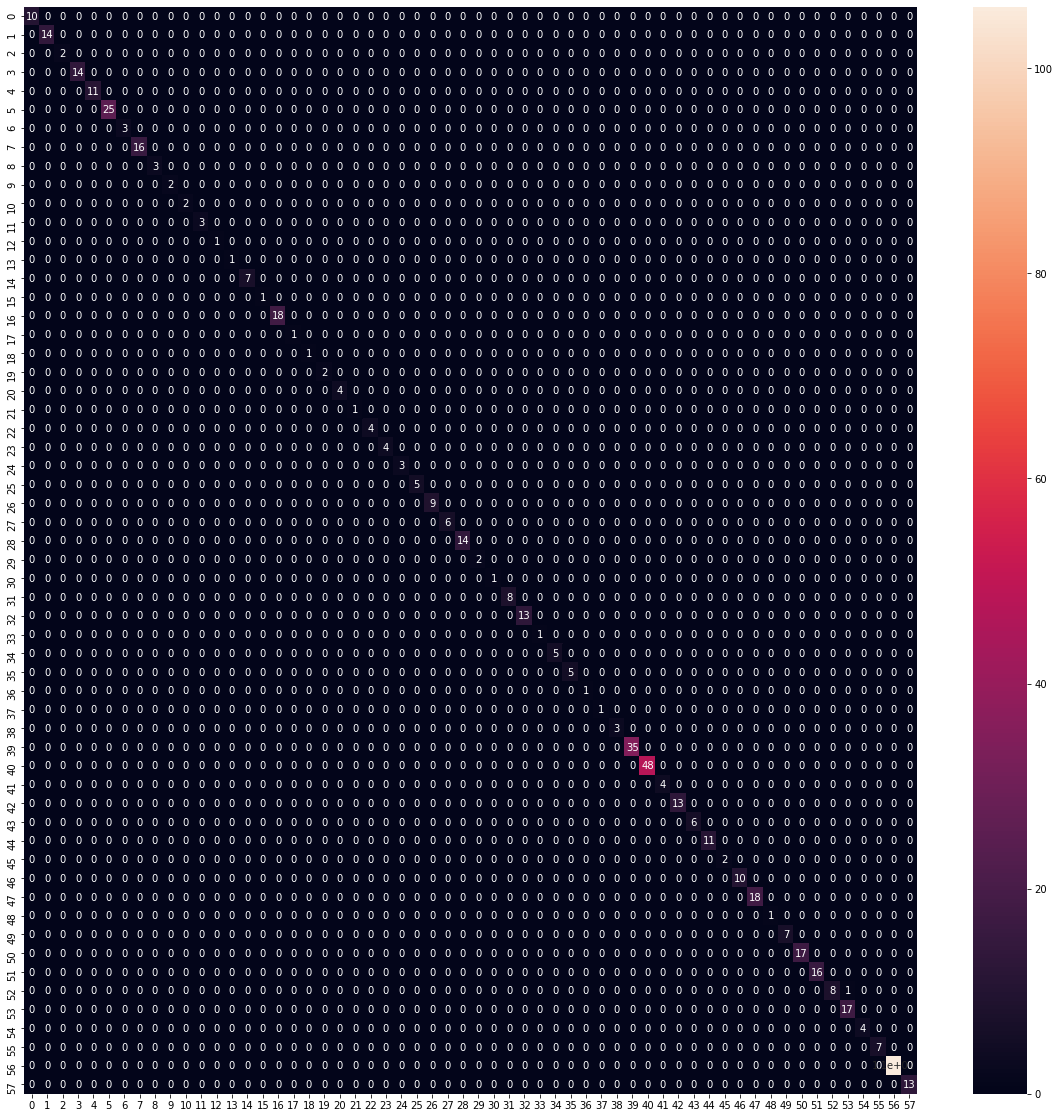

In [227]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
import seaborn as sns
sns.heatmap(cm, annot = True)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_bagpred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         7
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00        18
          19       1.00    

## Model Building-Bagging vs Boosting using base estimator as Decision Tree with gini

In [48]:
# to create the DT model - base estimator (gini)
from sklearn.tree import DecisionTreeClassifier
DTC_gini = DecisionTreeClassifier(criterion='gini') 

# train the classifier on training data
DTC_gini.fit(x_train, y_train)

DecisionTreeClassifier()

In [49]:
y_pred = DTC_gini.predict(x_test)
y_pred

array([49, 18,  5, 22, 60,  4, 51, 51,  4, 45, 36, 67, 67, 49, 50, 46, 58,
        3, 56,  5, 67,  7, 33,  7, 44, 44, 67,  7, 56, 36, 30,  4,  5,  0,
       67,  7, 56, 51, 36, 67, 62, 51,  0, 30, 28, 58,  3, 44, 36, 62, 25,
       39, 16, 56, 60, 18,  7, 67, 60, 45, 18, 67,  5,  8, 39, 59, 26, 59,
       44, 45, 36, 67, 56, 45, 45, 35, 66, 35,  3, 39, 36, 68, 45, 59, 67,
       32, 45, 45, 22, 53,  6, 36, 60, 26, 18, 60,  3, 67, 32, 38, 67, 67,
       16,  5,  9,  5, 59, 67, 16,  4, 60, 36, 44, 38,  4, 31, 45,  1, 68,
       66, 31, 35, 45, 51, 62, 54, 60, 54, 50, 68,  5,  7, 22, 67, 30, 67,
       61, 16,  5, 18, 45,  0, 51, 44, 54, 45, 62, 51, 59,  3, 67, 18, 25,
       68, 57, 56,  4, 34, 44, 68, 58,  5, 16, 45, 35, 44, 67,  5, 67, 49,
       45, 59, 18, 67,  5,  1, 67,  6, 45,  0, 56, 67, 67, 49, 43, 67, 67,
       22,  1, 45,  5, 60, 49, 18,  3, 64,  5, 62, 39, 67, 49,  8, 45, 51,
       67, 62, 67, 45, 30, 67, 68,  0,  0, 67, 60, 59, 59, 18, 45, 58, 44,
       67,  0, 29, 67, 67

-----

In [50]:
# to create boosting model

from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(base_estimator = DTC_gini, n_estimators = 400, learning_rate = 1)

boostmodel = AdaBoost.fit(x_train, y_train)

C:\Users\MUJTABA\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [51]:
y_boostpred = boostmodel.predict(x_test)
y_boostpred

array([49, 18,  5, 22, 60,  4, 51, 51,  4, 45, 36, 67, 67, 49, 50, 46, 58,
        3, 56,  5, 67,  7, 33,  7, 44, 44, 67,  7, 56, 36, 30,  4,  5,  0,
       67,  7, 56, 51, 36, 67, 62, 51,  0, 30, 28, 58,  3, 44, 36, 62, 25,
       39, 16, 56, 60, 18,  7, 67, 60, 45, 18, 67,  5,  8, 39, 59, 26, 59,
       44, 45, 36, 67, 56, 45, 45, 35, 66, 35,  3, 39, 36, 68, 45, 59, 67,
       32, 45, 45, 22, 53,  6, 36, 60, 26, 18, 60,  3, 67, 32, 38, 67, 67,
       16,  3,  9,  5, 59, 67, 16,  4, 60, 36, 44, 38,  4, 31, 45,  1, 68,
       66, 31, 35, 45, 51, 62, 54, 60, 54, 50, 68,  5,  7, 22, 67, 30, 67,
       61, 16,  5, 18, 45,  0, 51, 44, 54, 45, 62, 51, 59,  3, 67, 18, 25,
       68, 57, 56,  4, 34, 44, 68, 58,  5, 16, 45, 35, 44, 67,  5, 67, 49,
       45, 59, 18, 67,  5,  1, 67,  6, 45,  0, 56, 67, 67, 49, 43, 67, 67,
       22,  1, 45,  5, 60, 49, 18,  3, 64,  5, 62, 39, 67, 49,  8, 45, 51,
       67, 62, 67, 45, 30, 67, 68,  0,  0, 67, 60, 59, 59, 18, 45, 58, 44,
       67,  0, 29, 67, 67

In [52]:
accuracy_score(y_boostpred, y_test)*100

99.47460595446584

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_boostpred,y_test)
cm

array([[ 10,   0,   0, ...,   0,   0,   0],
       [  0,  14,   0, ...,   0,   0,   0],
       [  0,   0,   2, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   7,   0,   0],
       [  0,   0,   0, ...,   0, 106,   0],
       [  0,   0,   0, ...,   0,   0,  13]], dtype=int64)

<AxesSubplot:>

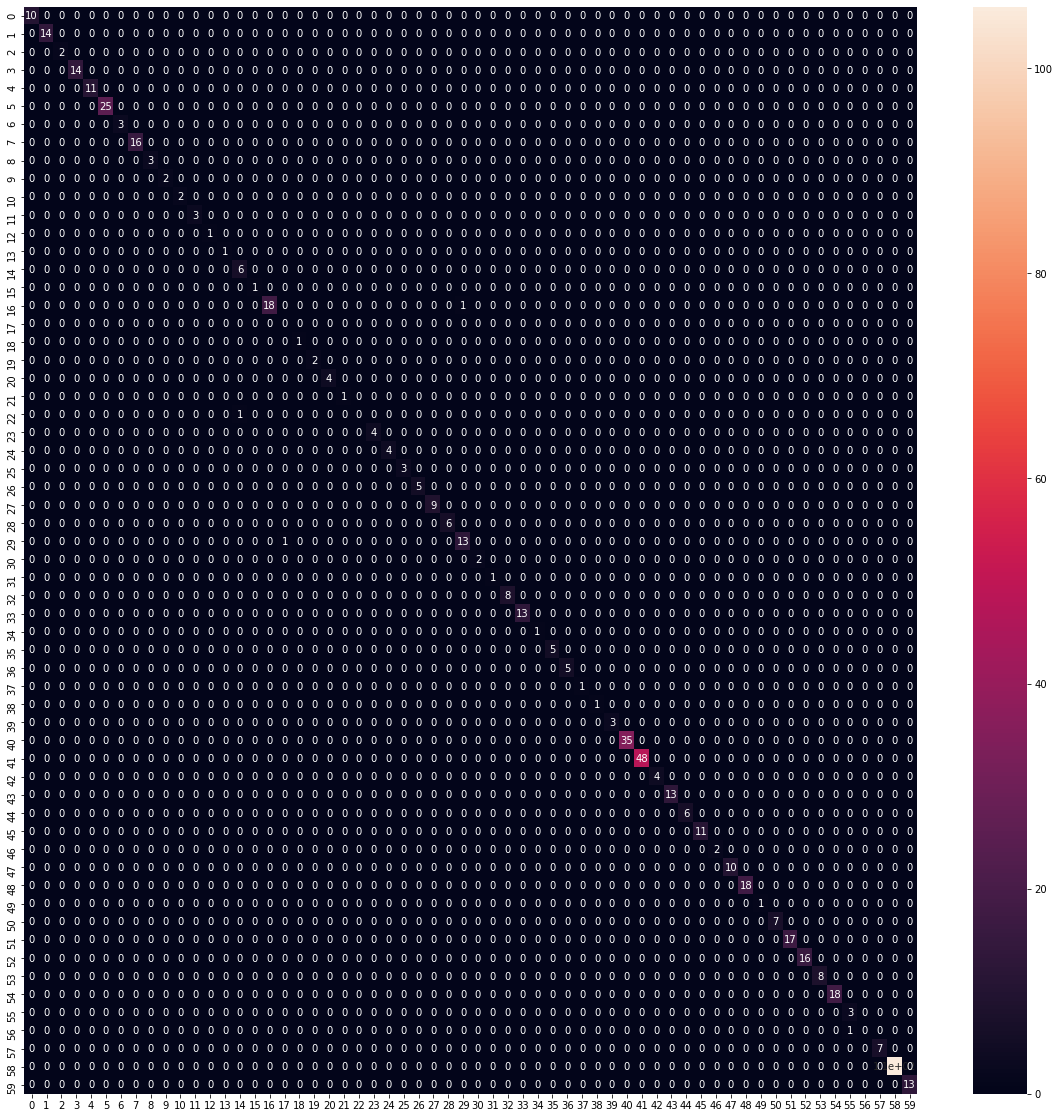

In [235]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
import seaborn as sns
sns.heatmap(cm, annot = True)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_boostpred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       0.86      1.00      0.92         6
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00        18
          19       0.00    

C:\Users\MUJTABA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--------

In [55]:
# to create bagging model

from sklearn.ensemble import BaggingClassifier
Bag = BaggingClassifier(base_estimator = DTC_gini, n_estimators = 400, max_samples = 0.8, oob_score = True, random_state = 0)

Bag.fit(x_train, y_train)

C:\Users\MUJTABA\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=400, oob_score=True, random_state=0)

In [56]:
y_bagpred = Bag.predict(x_test)
y_bagpred

array([49, 18,  5, 22, 60,  4, 51, 51,  4, 45, 36, 67, 67, 49, 50, 46, 58,
        3, 56,  5, 67,  7, 33,  7, 44, 44, 67,  7, 56, 36, 30,  4,  5,  0,
       67,  7, 56, 51, 36, 67, 62, 51,  0, 30, 28, 58,  3, 44, 36, 62, 25,
       39, 16, 56, 60, 18,  7, 67, 60, 45, 18, 67,  5,  8, 39, 59, 26, 59,
       44, 45, 36, 67, 56, 45, 45, 35, 66, 35,  3, 39, 36, 68, 45, 59, 67,
       32, 45, 45, 22, 53,  6, 36, 60, 26, 18, 60,  3, 67, 32, 38, 67, 67,
       16,  3,  9,  5, 59, 67, 16,  4, 60, 36, 44, 38,  4, 31, 45,  1, 68,
       66, 31, 35, 45, 51, 62, 54, 60, 54, 50, 68,  5,  7, 22, 67, 30, 67,
       61, 16,  5, 18, 45,  0, 51, 44, 54, 45, 62, 51, 59,  3, 67, 18, 25,
       68, 57, 56,  4, 34, 44, 68, 58,  5, 16, 45, 35, 44, 67,  5, 67, 49,
       45, 59, 18, 67,  5,  1, 67,  6, 45,  0, 56, 67, 67, 49, 43, 67, 67,
       22,  1, 45,  5, 60, 49, 18,  3, 64,  5, 62, 39, 67, 49,  8, 45, 51,
       67, 62, 67, 45, 30, 67, 68,  0,  0, 67, 60, 59, 59, 18, 45, 58, 44,
       67,  0, 29, 67, 67

In [57]:
accuracy_score(y_bagpred, y_test)*100

100.0

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_bagpred,y_test)
cm

array([[ 10,   0,   0, ...,   0,   0,   0],
       [  0,  14,   0, ...,   0,   0,   0],
       [  0,   0,   2, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   7,   0,   0],
       [  0,   0,   0, ...,   0, 106,   0],
       [  0,   0,   0, ...,   0,   0,  13]], dtype=int64)

<AxesSubplot:>

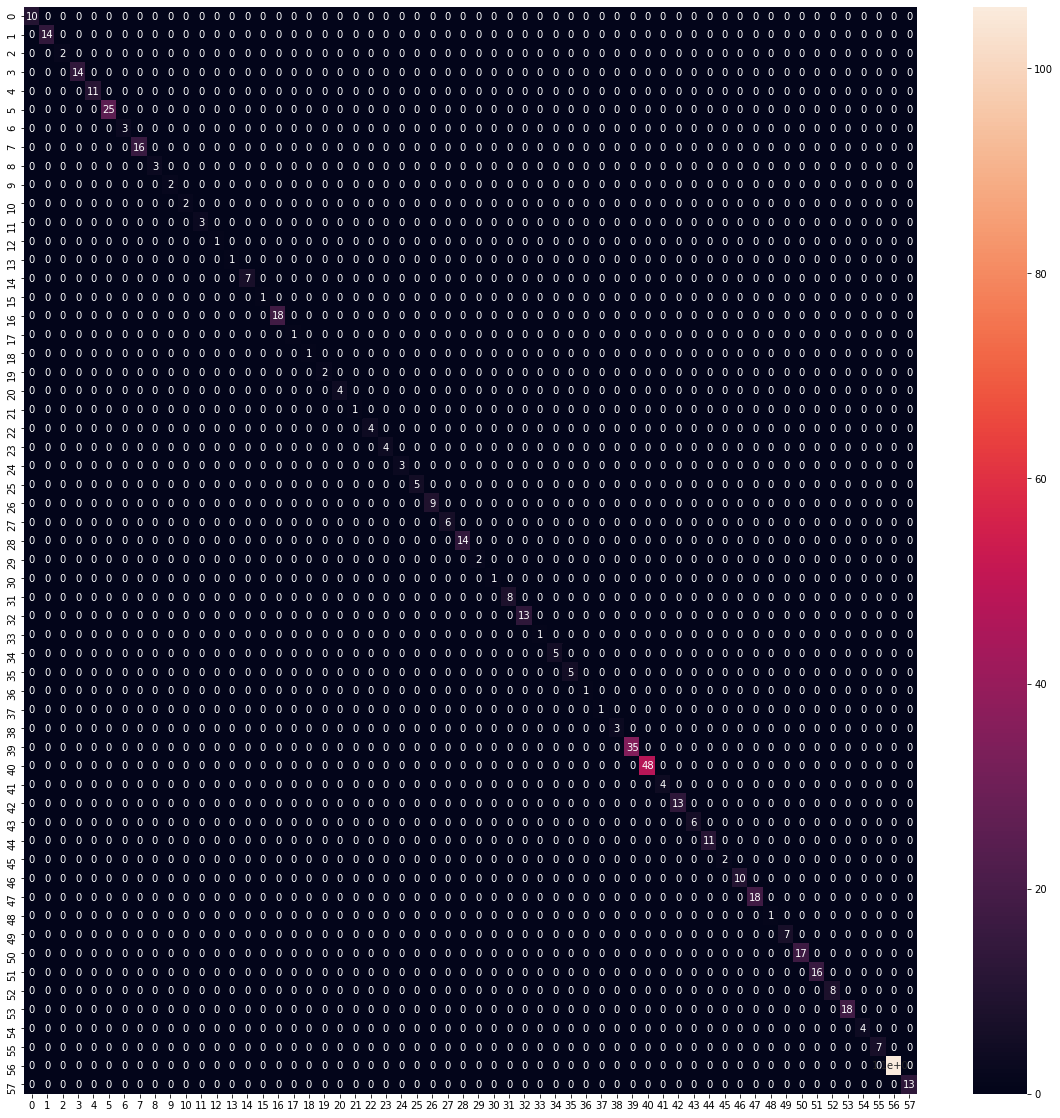

In [241]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
import seaborn as sns
sns.heatmap(cm, annot = True)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_bagpred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         7
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00        18
          19       1.00    